## Microsoft Industry Project

Microsoft has been a leader in the tech industry for many years due to its prodcut development and technological advancements. With their revenue and profits soaring throughout the years, they have decided to venture into different industries in order to diversify their investments. They have hired 3 data scientists to explore and analyze the movie industry data and set recommendations for their first movie.

### Metric: 
**Return on Investment(ROI)**

### Questions to be answered

1- What are the top 3 genres with the highest ROIs?

2- Do release date months affect the ROI of the 3 genres?

3- What were the production costs for the top 3 genres with the highest ROIs?

## Importing the libraries

In [114]:
# import python libraries
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

## Reading the data

In [115]:
# open the first data file
title_basics = pd.read_csv('Data/imdb.title.basics.csv.gz')
title_basics.head()
title_basics['start_year'].min()

2010

In [116]:
# open the second data file
title_ratings = pd.read_csv('Data/imdb.title.ratings.csv.gz')
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [117]:
# open the third data file
movie_budgets = pd.read_csv('Data/tn.movie_budgets.csv.gz')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Data Preperation
Before performing any analysis, the data has to be cleaned and merged for a proper dataset

***Steps to preare data for title_basics***
1. Rename and drop columns
2. Calculate percentage of nulls in genre and drop null values

In [118]:
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [119]:
#1
title_basics.rename(columns = {'primary_title':'movie'}, inplace = True)

In [120]:
#1
title_basics.drop(columns = ["original_title","runtime_minutes"], inplace=True)

In [121]:
title_basics['genres'].isna().sum()/146144*100

3.7004598204510617

In [122]:
#2
title_basics.dropna(subset= ['genres'], inplace = True)

In [123]:
title_basics.head()

,tconst,movie,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"


***

***Steps to prepare data for movie_budgets***
1. Add release_year and release_month columns
2. Change production_budget, domestic_gross, and worldwide_budget to integers
3. Drop id column and drop rows where worldwide_gross or production_budget == 0
4. Add profit column & Calculate:
    1. profit in millions
    2. production budget in millions
5. Add ROI column(calculates return on investment) and round to 2 decimal places
6. Add movie year column

In [124]:
#1
movie_budgets["release_year"]= [x[7:] for x in movie_budgets["release_date"]]
movie_budgets["release_month"]= [x[:4] for x in movie_budgets["release_date"]]

#for the purpose of graphing, edited each month with numeric values in the beginning 
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Jan", "01 Jan")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Feb", "02 Feb")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Mar", "03 Mar")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Apr", "04 Apr")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("May", "05 May")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Jun", "06 Jun")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Jul", "07 Jul")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Aug", "08 Aug")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Sep", "09 Sep")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Oct", "10 Oct")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Nov", "11 Nov")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Dec", "12 Dec")

In [125]:
#2
movie_budgets['production_budget'] = movie_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

In [126]:
#3
movie_budgets.drop(columns = ["id"], inplace=True)
# drop rows where worldwide_gross or production_budget is 0
movie_budgets = movie_budgets[movie_budgets.worldwide_gross != 0]
movie_budgets = movie_budgets[movie_budgets.production_budget != 0]

In [127]:
#4
movie_budgets['profit'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']
# calculate profit in millions
movie_budgets['profit_million']=(movie_budgets['profit']/1000000)
# calculate production budget in millions
movie_budgets['production_budget_million']=(movie_budgets['production_budget']/1000000)

In [128]:
#5
movie_budgets['ROI'] = (movie_budgets['profit'] / movie_budgets['production_budget']) * 100
movie_budgets = movie_budgets.round({'ROI': 2})

In [129]:
#6
movie_budgets['year'] = pd.DatetimeIndex(movie_budgets['release_date']).year

In [130]:
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,profit,profit_million,production_budget_million,ROI,year
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2009,12 Dec,2.351345e+09,2351.345279,425.0,553.26,2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,05 May,6.350639e+08,635.063875,410.6,154.67,2011
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,06 Jun,-2.002376e+08,-200.237650,350.0,-57.21,2019
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,05 May,1.072414e+09,1072.413963,330.6,324.38,2015
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12 Dec,9.997217e+08,999.721747,317.0,315.37,2017


***

## Merging Data Tables
Merge the two tables in order to get a proper dataframe 

***Steps to merge data for new dataframe: mdf***
1. Merge title_basics and title_ratings into: imdb_data
2. Merge imdb_data and movie_budgets into: mdf

In [131]:
#1
imdb_data = pd.merge(title_basics, title_ratings, how = 'inner', on = 'tconst')

In [132]:
#2
mdf = pd.merge(imdb_data, movie_budgets, how = 'inner', on = 'movie')

In [133]:
mdf.shape

(2592, 17)

***

## Preparing mdf dataframe
The dataframe ***mdf*** needs to be cleaned, sorted and filtered in order to keep the proper values

***Steps to prepare dataframe***
1. Move the movies with the most votes on imdb_data up to top
2. Create a column same_year that is 0 if the movies have the same start year and same year from the release date column
3. Change mdf to include movies only if same_year == 0
4. Drop:
    1. duplicate titles
    2. tconst

In [134]:
#1
mdf=mdf.sort_values(by='numvotes', ascending = False)

In [135]:
#2
mdf['same_year']= mdf['start_year']-mdf['year']

In [136]:
#3
mdf = mdf.loc[mdf['same_year']== 0]

In [137]:
#4
mdf = mdf.drop_duplicates(subset='movie')
mdf.drop(columns = ["tconst"], inplace=True)

In [138]:
mdf.shape

(1357, 17)

***

## Checking for data rows
The IMDB data contains movies only from 2010 on. The movie budgets table has movies ranging back to 1915, so we figured that when we merge the two tables we will be limited in the number of movies that are shared between the two tables. 

To make sure our merge of IMDB data with the movie budgets provided us with a good number of data, before merging we looked at the mean ROI from the movie budgets table for the years after 2010.  Then we compared it to the mean ROI after merging the two tables.

***Steps to check for number of data rows***
1. Create movie_budgets_filtered, filtering the values from movie_budgets['year'] >= 10
2. Find the ROI mean of movie_budgets_filtered
3. Find the ROI mean of mdf

In [139]:
#1
movie_budgets_filtered = movie_budgets[movie_budgets['year'] >= 2010]

In [140]:
#2
movie_budgets_filtered['ROI'].mean()

266.4769458896981

In [141]:
#3
mdf['ROI'].mean()

298.7207295504783

The mean ROI for the data before merging is slightly lower than the data after merging, however they are close enough to continue working with the reduced amount of data.

## Finding how to subset mdf['genre']
We then explored how to proceed with the gernes. First we investigated whether a subset of the  combined genres would represent enough of the movie data to look at the combined genres as individual categories.

In [142]:
mdf['genres'].value_counts()

Adventure,Animation,Comedy      67
Action,Adventure,Sci-Fi         51
Comedy,Drama,Romance            49
Comedy                          48
Comedy,Drama                    42
                                ..
Drama,Music,Musical              1
Adventure,Comedy,Romance         1
Action,Comedy,Sport              1
Adventure,Drama,History          1
Action,Biography,Documentary     1
Name: genres, Length: 214, dtype: int64

There are 214 unique genre combinations. We look at the top 20 genres (about 10% of the total genres) to see if that represented enough of the data set to proceed with the combined genres.

In [143]:
mdf_combined_genres = mdf[mdf['genres'].map(mdf['genres'].value_counts() >= 17)] 

In [144]:
mdf_combined_genres['genres'].value_counts()

Adventure,Animation,Comedy    67
Action,Adventure,Sci-Fi       51
Comedy,Drama,Romance          49
Comedy                        48
Comedy,Drama                  42
Drama                         40
Comedy,Romance                40
Action,Crime,Drama            38
Drama,Romance                 32
Action,Adventure,Fantasy      31
Action,Comedy,Crime           29
Horror,Mystery,Thriller       29
Action,Adventure,Drama        26
Drama,Thriller                21
Crime,Drama,Thriller          21
Action,Crime,Thriller         21
Biography,Drama,History       20
Action,Adventure,Comedy       20
Horror,Thriller               20
Biography,Comedy,Drama        17
Name: genres, dtype: int64

In [145]:
mdf_combined_genres['genres'].value_counts().sum()

662

In [146]:
662/1357

0.48784082535003687

The top 20 combined genres, which is about 10% of the combined genres, represent less than 50% of the movies in the data. For that reason, it will be more helpful to look at the movies separated into single genres.

## Seperating mdf['genre'] 
Each genre is seperated into its own value in order to compare the averages of the ROI. This will allow us to view the genres with the highest average ROI.

***Steps to seperating genres***
1. Seperate genres column values into lists
2. Create a new dataframe mdf2 to filter each genre within a movie
3. Remove 'The Gallows' movie and 'The Devil Inside'(both are outliers) and set the new dataframe to no_gallows
4. Filter no_gallows to only include positive ROIs, creating a new dataframe: no_gallows_pos
5. Create sorted_genres2 dataframe which is grouped by the unique genres

In [147]:
#1
mdf["genres"] = mdf["genres"].apply(lambda x: x.split(",") if type(x) == str else x)

In [148]:
mdf.shape

(1357, 17)

In [149]:
mdf.head()

,movie,start_year,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,release_year,release_month,profit,profit_million,production_budget_million,ROI,year,same_year
510,Inception,2010,"[Action, Adventure, Sci-Fi]",8.8,1841066,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08,2010,07 Jul,6.755246e+08,675.524642,160.0,422.20,2010,0
477,The Dark Knight Rises,2012,"[Action, Thriller]",8.4,1387769,"Jul 20, 2012",275000000.0,448139099.0,1.084439e+09,2012,07 Jul,8.094391e+08,809.439099,275.0,294.34,2012,0
96,Interstellar,2014,"[Adventure, Drama, Sci-Fi]",8.6,1299334,"Nov 5, 2014",165000000.0,188017894.0,6.663794e+08,2014,11 Nov,5.013794e+08,501.379375,165.0,303.87,2014,0
1296,Django Unchained,2012,"[Drama, Western]",8.4,1211405,"Dec 25, 2012",100000000.0,162805434.0,4.499483e+08,2012,12 Dec,3.499483e+08,349.948323,100.0,349.95,2012,0
110,The Avengers,2012,"[Action, Adventure, Sci-Fi]",8.1,1183655,"May 4, 2012",225000000.0,623279547.0,1.517936e+09,2012,05 May,1.292936e+09,1292.935897,225.0,574.64,2012,0


In [150]:
#2
mdf2 = mdf.explode('genres')

In [151]:
mdf2.shape

(3530, 17)

In [152]:
mdf2['genres'].unique()

array(['Action', 'Adventure', 'Sci-Fi', 'Thriller', 'Drama', 'Western',
       'Biography', 'Crime', 'Mystery', 'Comedy', 'Family', 'Fantasy',
       'Animation', 'Romance', 'Music', 'History', 'Horror', 'Sport',
       'War', 'Musical', 'Documentary'], dtype=object)

In [153]:
len(mdf2['genres'].unique())

21

In [154]:
#3
no_gallows = mdf2.drop(index = 1722).sort_values(by="ROI",ascending = False)
no_gallows = no_gallows.drop(index = 782).sort_values(by="ROI",ascending = False)

In [155]:
no_gallows.shape

(3526, 17)

In [156]:
#4
no_gallows_pos = no_gallows[no_gallows["ROI"] > 0]

In [157]:
no_gallows_pos

,movie,start_year,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,release_year,release_month,profit,profit_million,production_budget_million,ROI,year,same_year
755,Paranormal Activity 2,2010,Horror,5.7,93122,"Oct 20, 2010",3000000.0,84752907.0,177512032.0,2010,10 Oct,174512032.0,174.512032,3.0,5817.07,2010,0
2402,Get Out,2017,Thriller,7.7,400474,"Feb 24, 2017",5000000.0,176040665.0,255367951.0,2017,02 Feb,250367951.0,250.367951,5.0,5007.36,2017,0
2402,Get Out,2017,Horror,7.7,400474,"Feb 24, 2017",5000000.0,176040665.0,255367951.0,2017,02 Feb,250367951.0,250.367951,5.0,5007.36,2017,0
2402,Get Out,2017,Mystery,7.7,400474,"Feb 24, 2017",5000000.0,176040665.0,255367951.0,2017,02 Feb,250367951.0,250.367951,5.0,5007.36,2017,0
2393,Moonlight,2016,Drama,7.4,227964,"Oct 21, 2016",1500000.0,27854931.0,65245512.0,2016,10 Oct,63745512.0,63.745512,1.5,4249.70,2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Stoker,2013,Drama,6.8,97393,"Mar 1, 2013",12000000.0,1703125.0,12034913.0,2013,03 Mar,34913.0,0.034913,12.0,0.29,2013,0
994,Stoker,2013,Thriller,6.8,97393,"Mar 1, 2013",12000000.0,1703125.0,12034913.0,2013,03 Mar,34913.0,0.034913,12.0,0.29,2013,0
148,Hugo,2011,Drama,7.5,284869,"Nov 23, 2011",180000000.0,73864507.0,180047784.0,2011,11 Nov,47784.0,0.047784,180.0,0.03,2011,0
148,Hugo,2011,Adventure,7.5,284869,"Nov 23, 2011",180000000.0,73864507.0,180047784.0,2011,11 Nov,47784.0,0.047784,180.0,0.03,2011,0


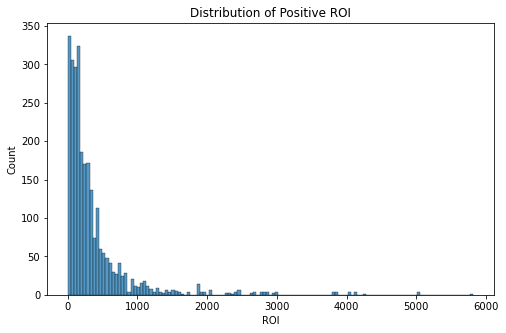

In [158]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.histplot(data=no_gallows_pos, x='ROI')
ax.set_title("Distribution of Positive ROI")
fig.savefig('images/histogram_posROI');

This distribution is right skewed

In [159]:
#5
sorted_genres2 = no_gallows_pos.groupby(["genres"], as_index=False).mean().sort_values(by = "ROI", ascending=False)

top3genres_v2 = list(sorted_genres2['genres'].values[0:3])
top3genres_v2

['Horror', 'Mystery', 'Thriller']

In [160]:
sorted_genres2

,genres,start_year,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,profit,profit_million,production_budget_million,ROI,year,same_year
11,Horror,2014.453704,5.810185,92162.203704,2.159792e+07,4.771430e+07,1.051221e+08,8.352416e+07,83.524158,21.597917,892.908148,2014.453704,0.0
14,Mystery,2014.177778,6.287778,162969.644444,2.911125e+07,5.305549e+07,1.226729e+08,9.356169e+07,93.561693,29.111252,781.217333,2014.177778,0.0
18,Thriller,2013.884393,6.282081,165496.289017,4.010788e+07,6.362149e+07,1.668024e+08,1.266945e+08,126.694500,40.107877,582.025029,2013.884393,0.0
13,Musical,2014.250000,7.075000,135745.000000,7.682500e+07,1.804056e+08,4.468113e+08,3.699863e+08,369.986349,76.825000,406.085000,2014.250000,0.0
3,Biography,2014.852273,7.222727,153770.738636,2.821330e+07,5.641716e+07,1.171555e+08,8.894218e+07,88.942179,28.213295,392.459091,2014.852273,0.0
6,Documentary,2012.705882,6.347059,14655.294118,1.409853e+07,2.127135e+07,4.544084e+07,3.134231e+07,31.342312,14.098529,381.481765,2012.705882,0.0
7,Drama,2013.870690,6.764224,138254.855603,3.105727e+07,4.866020e+07,1.077761e+08,7.671886e+07,76.718863,31.057269,368.058772,2013.870690,0.0
15,Romance,2012.985507,6.403623,96936.500000,2.633163e+07,4.333942e+07,8.983322e+07,6.350159e+07,63.501590,26.331630,364.430145,2012.985507,0.0
12,Music,2013.750000,6.413889,87163.638889,2.066389e+07,4.554701e+07,1.000802e+08,7.941636e+07,79.416357,20.663889,362.126667,2013.750000,0.0
16,Sci-Fi,2014.333333,6.745098,341202.176471,1.145252e+08,1.621483e+08,4.458693e+08,3.313440e+08,331.344011,114.525245,361.363529,2014.333333,0.0


## Question 1
In order for our recommendations to be filtered to best suit Microsoft we needed to figure out which genres can have the greatest average ROI. After seperating by each genre we were able to group each one and give the result of the mean ROI for each genre. 

In [161]:
nsort = no_gallows_pos.groupby(["genres"], as_index=False).mean().sort_values(by = "ROI", ascending=True)

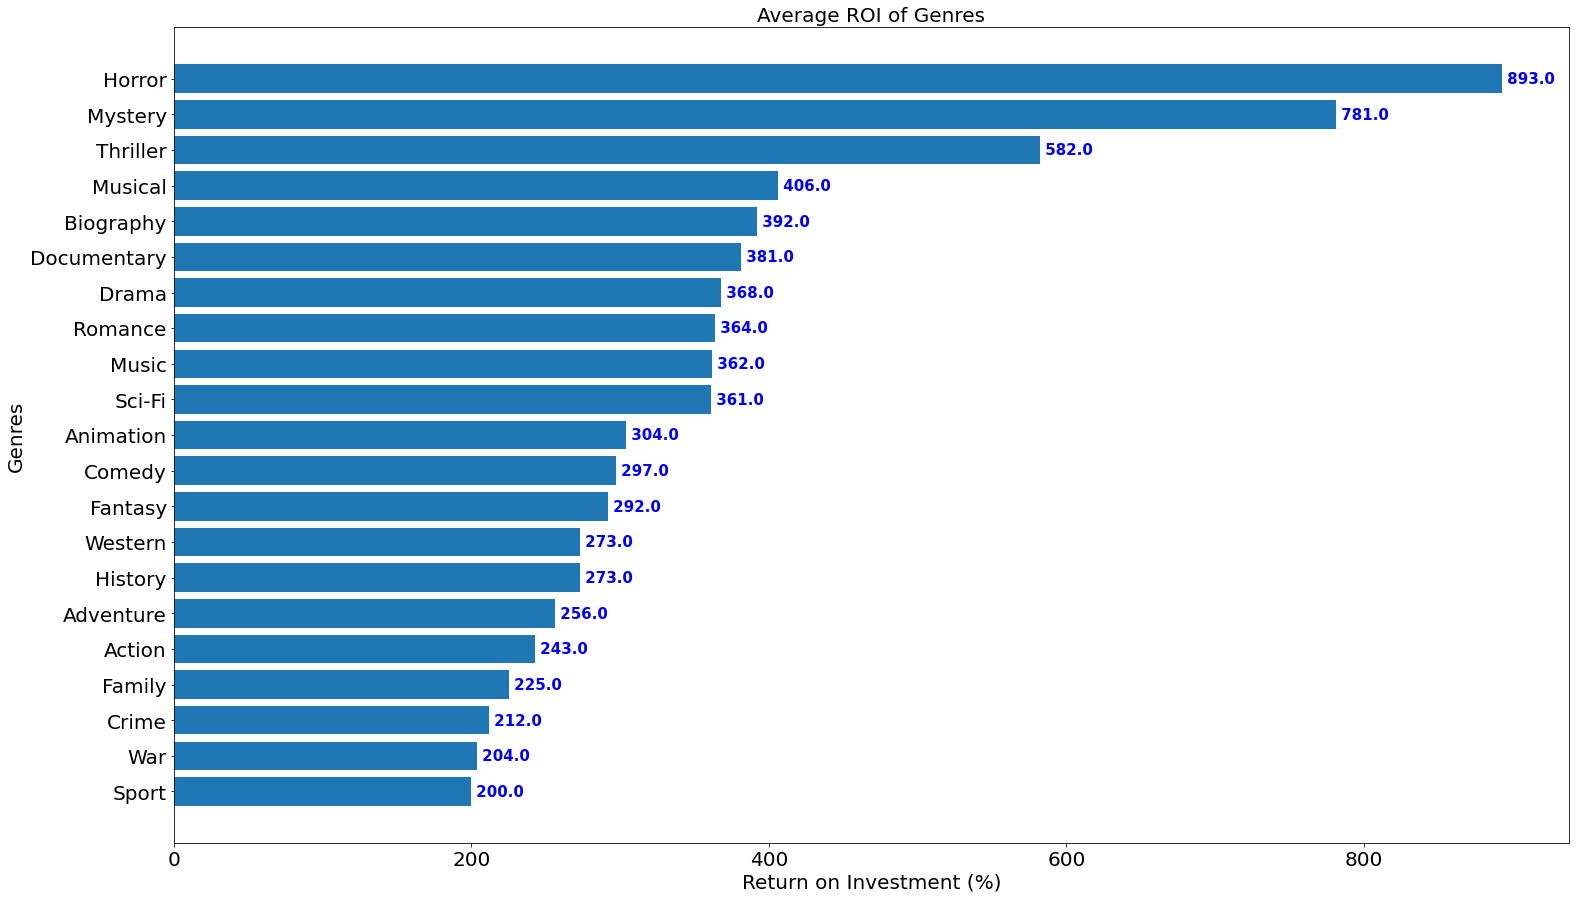

In [162]:
fig, ax = plt.subplots(figsize=(25, 15))
x = nsort['genres']
y = nsort['ROI']
y = y.round()
ax.barh(x, y)
ax.set_title('Average ROI of Genres')
ax.set_xlabel('Return on Investment (%)')
ax.set_ylabel('Genres')

for i, v in enumerate(y):
    ax.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold', fontsize= 15)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)


The top three genres are: Horror, Mystery, Thriller

## Question 2
After filtering for the highest average ROI by genre we were able to filter out the top 3 genres. It will allow Microsoft to gain a better understanding of when to release their movie. 

In [163]:
top3genres_v2
mdf2_top_three = no_gallows_pos.loc[no_gallows_pos['genres'].isin(top3genres_v2)] 
mean_ROI_by_month = mdf2_top_three.groupby("release_month").mean()
mdf2_top_three
#mean_ROI_by_month

,movie,start_year,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,release_year,release_month,profit,profit_million,production_budget_million,ROI,year,same_year
755,Paranormal Activity 2,2010,Horror,5.7,93122,"Oct 20, 2010",3000000.0,84752907.0,177512032.0,2010,10 Oct,174512032.0,174.512032,3.00,5817.07,2010,0
2402,Get Out,2017,Thriller,7.7,400474,"Feb 24, 2017",5000000.0,176040665.0,255367951.0,2017,02 Feb,250367951.0,250.367951,5.00,5007.36,2017,0
2402,Get Out,2017,Horror,7.7,400474,"Feb 24, 2017",5000000.0,176040665.0,255367951.0,2017,02 Feb,250367951.0,250.367951,5.00,5007.36,2017,0
2402,Get Out,2017,Mystery,7.7,400474,"Feb 24, 2017",5000000.0,176040665.0,255367951.0,2017,02 Feb,250367951.0,250.367951,5.00,5007.36,2017,0
1446,Chernobyl Diaries,2012,Thriller,5.0,60304,"May 25, 2012",1000000.0,18119640.0,42411721.0,2012,05 May,41411721.0,41.411721,1.00,4141.17,2012,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,Take Shelter,2011,Thriller,7.4,83200,"Sep 30, 2011",4750000.0,1728953.0,4972016.0,2011,09 Sep,222016.0,0.222016,4.75,4.67,2011,0
989,Take Shelter,2011,Horror,7.4,83200,"Sep 30, 2011",4750000.0,1728953.0,4972016.0,2011,09 Sep,222016.0,0.222016,4.75,4.67,2011,0
1075,Scouts Guide to the Zombie Apocalypse,2015,Horror,6.3,40479,"Oct 30, 2015",15000000.0,3703046.0,15554855.0,2015,10 Oct,554855.0,0.554855,15.00,3.70,2015,0
1046,Alex Cross,2012,Mystery,5.1,30951,"Oct 19, 2012",35000000.0,25888412.0,35426759.0,2012,10 Oct,426759.0,0.426759,35.00,1.22,2012,0


### Mean ROI by Month for the Top 3 Genres (2010-2020)

Text(0.5, 0, 'Month')

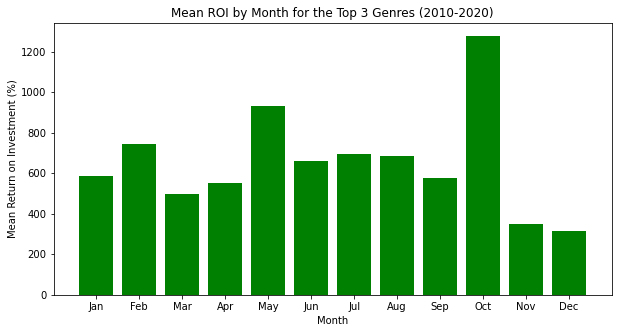

In [164]:
height = mean_ROI_by_month['ROI']
x = range(12)
labels = ["Jan", "Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec",]

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI by Month for the Top 3 Genres (2010-2020)")
ax.set_ylabel("Mean Return on Investment (%)")
ax.set_xlabel("Month")

Graph shows mean positive ROI for the top three genres for each month of the year from 2010 to 2020

## Question 3

### ROI vs. Production Budget
After having the top three genres and having a general idea for when to release a movie, Microsoft would also need to know how much to spend for each genre. We will be comparing how much to spend in relation to ROI. 

Looks at top 3 genres with only positive ROI

In [165]:
boolean_series = no_gallows_pos.genres.isin(top3genres_v2)
pos_top3_df = no_gallows_pos[boolean_series]
pos_top3_df

,movie,start_year,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,release_year,release_month,profit,profit_million,production_budget_million,ROI,year,same_year
755,Paranormal Activity 2,2010,Horror,5.7,93122,"Oct 20, 2010",3000000.0,84752907.0,177512032.0,2010,10 Oct,174512032.0,174.512032,3.00,5817.07,2010,0
2402,Get Out,2017,Thriller,7.7,400474,"Feb 24, 2017",5000000.0,176040665.0,255367951.0,2017,02 Feb,250367951.0,250.367951,5.00,5007.36,2017,0
2402,Get Out,2017,Horror,7.7,400474,"Feb 24, 2017",5000000.0,176040665.0,255367951.0,2017,02 Feb,250367951.0,250.367951,5.00,5007.36,2017,0
2402,Get Out,2017,Mystery,7.7,400474,"Feb 24, 2017",5000000.0,176040665.0,255367951.0,2017,02 Feb,250367951.0,250.367951,5.00,5007.36,2017,0
1446,Chernobyl Diaries,2012,Thriller,5.0,60304,"May 25, 2012",1000000.0,18119640.0,42411721.0,2012,05 May,41411721.0,41.411721,1.00,4141.17,2012,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,Take Shelter,2011,Thriller,7.4,83200,"Sep 30, 2011",4750000.0,1728953.0,4972016.0,2011,09 Sep,222016.0,0.222016,4.75,4.67,2011,0
989,Take Shelter,2011,Horror,7.4,83200,"Sep 30, 2011",4750000.0,1728953.0,4972016.0,2011,09 Sep,222016.0,0.222016,4.75,4.67,2011,0
1075,Scouts Guide to the Zombie Apocalypse,2015,Horror,6.3,40479,"Oct 30, 2015",15000000.0,3703046.0,15554855.0,2015,10 Oct,554855.0,0.554855,15.00,3.70,2015,0
1046,Alex Cross,2012,Mystery,5.1,30951,"Oct 19, 2012",35000000.0,25888412.0,35426759.0,2012,10 Oct,426759.0,0.426759,35.00,1.22,2012,0


Text(0, 0.5, 'Return on Investment (%)')

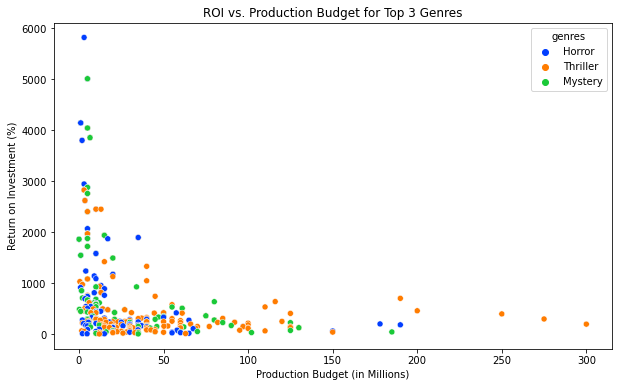

In [166]:
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.scatterplot(x='production_budget_million', y='ROI', data=pos_top3_df, 
                     hue='genres', palette = 'bright')
ax.set_title('ROI vs. Production Budget for Top 3 Genres')
ax.set_xlabel('Production Budget (in Millions)')
ax.set_ylabel('Return on Investment (%)')

In [167]:
from scipy import stats
corr1 = stats.pearsonr(pos_top3_df['production_budget_million'], pos_top3_df['ROI'])
corr2 = stats.spearmanr(pos_top3_df['production_budget_million'], pos_top3_df['ROI'])
print(corr1)
print(corr2)

(-0.30181296540007024, 2.9813761975968496e-09)
SpearmanrResult(correlation=-0.5319820959945208, pvalue=1.7062771810420243e-28)


Text(0.5, 0, 'Production Budget (in Millions)')

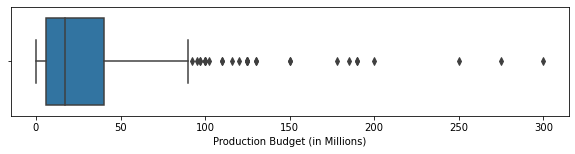

In [168]:
fig,ax = plt.subplots(figsize=(10,2))
ax= sns.boxplot(data = pos_top3_df, x = 'production_budget_million')
ax.set_xlabel('Production Budget (in Millions)')

The IQR of this box plot indicates a production range of 6 million to 40 million dollars

In [169]:
pos_top3_df['production_budget_million'].describe()

count    371.000000
mean      32.051888
std       41.383037
min        0.025000
25%        6.000000
50%       17.000000
75%       40.000000
max      300.000000
Name: production_budget_million, dtype: float64

***

## Evaluation

***Q1: Which genre should Microsoft produce a movie from?***

**Data Interpretation:**

By looking at movies from 2010 on, grouping them by genre indicators, and calculating the mean return on investment, we found these results as represented by the bar chart.
The top three genres that generated the greatest average ROI in descending order are horror, mystery, and thriller. 

1. The top three genres with the highest average ROIs:
    1. Horror
    2. Mystery
    3. Thriller
    
**Recommendation:** We recommend Microsoft to consider making a movie from these three genres or a movie with a combination of these genres as it will yield the highest ROIs. 

***Q2: What time of the year should Mircrosoft release the movie?***

**Data Interpretation:**

When examining release month with respect to the top three genres as a whole, October, January, and May had the greatest mean ROI compared to other months of the year.

**Recommendation:** Microsoft should consider on releasing a movie in the beginning of the year, May or October. The bar graph is evident of this as the month which produces the highest average ROI is October. 

***Q3: How much should the production cost be?***

**Data Interpretation:**

When looking at the relationship between the production budget and return on investment for the top three genres, it produces a weak negative correlation with a Spearman’s  correlation( ρ) of -0.53 and a Pearson’s correlation (r) of -0.30. This indicates that a higher production budget will not produce a greater return on investment. 

To gain a better understanding of the distribution of the production budgets, the box plot indicates that the middle 50% of the production budgets range from 6 million to 40 million dollars.

**Recommendation:** We recommend Microsoft to have a budget between 6 million and 40 million dollars for the production of a top three genre movie. 